# ICT3104-team08-2023

## Welcome to our team's notebook for our GenAI project...

### How to use this notebook:

1. View the table on contents via the left toolbar to get orientated with the overall structure of the notebook.
2. Each section of the project has been grouped and outlined properly.
3. The Intial Setup must be run whenever connected to a new runtime, this ensures we have the necessary repos, dependencies and files needed.
4. For the 'Intial Setup' section, you can use the '3 dots' menu on the right of the wording to run the entire section, this makes the setup process easier, rather than having to run individual cells.

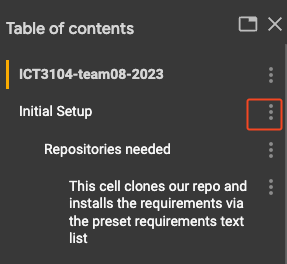

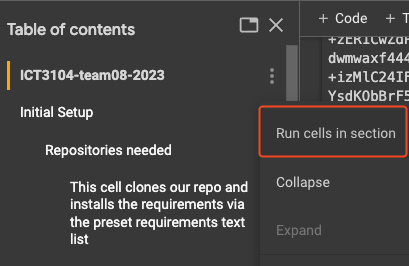


5. Do note, the Initial Setup process can take UP TO 25 mins!!

6. Make sure you have the following repositories in your runtime before trying to run Inference or Training:

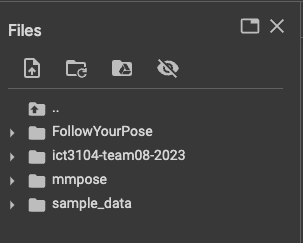

7. Usage of each following section is explained in their respective header cells


----
# 🍜 Initial Setup




## Repositories needed

### These repositories contain the files and directories we need to run the rest of the notebook

### we'll need to clone them into our current runtime and install the packages required - we'll do this in the following few cells

In [ ]:
# @title `This cell clones our repo and installs the requirements via the preset text list `
import time
from IPython.display import display, clear_output, HTML

start_time = time.time()

!git clone https://github.com/normanchia/ict3104-team08-2023
%cd ict3104-team08-2023
!pip install -r requirements.txt
!pip install -r requirements-2.txt

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (1/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (1/4) . 				Time elapsed: 4 minutes and 35.52 seconds...



In [ ]:
# @title `This cell updates our local environment, runtimes and python packages`

start_time = time.time()

%cd /content
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!python --version
!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

# print('Git clone project and install requirements...')
!git clone https://github.com/mayuelala/FollowYourPose.git

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (2/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (2/4) . 				Time elapsed: 0 minutes and 46.32 seconds...



In [ ]:
# @title `This cell adds further needed updates to our local environment, runtimes and python packages`

start_time = time.time()

!cd /content/FollowYourPose
!export PYTHONPATH=/content/FollowYourPose:$PYTHONPATH
# %pip install -r requirements.txt
!python -m pip install -q -U --pre triton
!apt update
!python -m pip install -q diffusers==0.11.1 torch==1.13.1 transformers==4.26.0 bitsandbytes==0.35.4 \
imageio-ffmpeg xformers==0.0.16  --extra-index-url https://download.pytorch.org/whl/cu113

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (3/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (3/4) . 				Time elapsed: 0 minutes and 53.07 seconds...



## Weight

### The following section helps us pull a preset model into our runtime, this will serve as the base model for later sections

In [ ]:
# @title `Once again, we're updating our local environment, runtimes and python packages` <br><br> WARNING: This cell can take up to 8 mins to run!!

start_time = time.time()

%cd /content/FollowYourPose/
%mkdir checkpoints
!git lfs install
!git clone https://huggingface.co/YueMafighting/FollowYourPose_v1
%mv /content/FollowYourPose/FollowYourPose_v1/* /content/FollowYourPose/checkpoints/
%rm -rf FollowYourPose_v1

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mInitial environment setup (4/4) . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

Initial environment setup (4/4) . 				Time elapsed: 3 minutes and 50.95 seconds...



---
#  MMPose

###  An additional repo we need to generate skeletons based off of real human actions


In [ ]:
# @title `We need this repo to generate our skeletons`

start_time = time.time()

%cd /content
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose
!pip install -r requirements.txt
!pip install -v -e .
!pip install --upgrade bitsandbytes

elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
green_text = f"\x1b[32mMMPose cloned successfully . \t\t\t\tTime elapsed: {int(minutes)} minutes and {seconds:.2f} seconds...\n\x1b[0m"
clear_output()
print(green_text)

MMPose cloned successfully . 				Time elapsed: 1 minutes and 25.70 seconds...



---
# Python Libraries to be installed and imported

### We need to install and import these libraries before we can move on to the next stages

In [ ]:
# @title `All necessary pip installs` <br><br> pip is a python package manager. <br><br>installing via pip simply means installing the packages in this environment and does not take up storage space on your machine if running in Google Colab

!pip install ruamel.yaml
!pip install tqdm
!pip install imageio
!pip install torch
!pip install moviepy
!pip install -U nvidia-cudnn-cu11
!pip install openmim
!pip install accelerate
!pip install nvidia-cublas-cu11
!pip install nvidia-cuda-nvrtc-cu11
!pip install nvidia-cuda-runtime-cu11
!pip install nvidia-cudnn-cu11==8.9.4.25
!pip install omegaconf
!pip install PyYAML
!mim install mmengine
!mim install "mmcv>=2.0.1"
!mim install "mmdet>=3.1.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.9/699.9 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-cudnn-cu11
    Found existing installation: nvidia-cudnn-cu11 8.5.0.96
    Uninstalling nvidia-cudnn-cu11-8.5.0.96:
      Successfully uninstalled nvidia-cudnn-cu11-8.5.0.96
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 1.13.1 requires nvidia-cudnn-cu11==8.5.0.96; platform_system == "Linux", but you have nvidia-cudnn-cu11 8.9.6.50 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.3 MB/s eta

  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Attempting uninstall: nvidia-cudnn-cu11
    Found existing installation: nvidia-cudnn-cu11 8.9.6.50
    Uninstalling nvidia-cudnn-cu11-8.9.6.50:
      Successfully uninstalled nvidia-cudnn-cu11-8.9.6.50
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.3/719.3 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-cudnn-cu11
    Found existing installation: nvidia-cudnn-cu11 8.5.0.96
    Uninstalling nvidia-cudnn-cu11-8.5.0.96:
      Successfully uninstalled nvidia-cudnn-cu11-8.5.0.96
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 1.13.1 requires nvidia-cudnn-cu11==8.5.0.96; platform_system == "Linux", but you have nvidia-cudnn-cu11 8.9.4.25 which is incompatible.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch1.13.0/index.html
     ━━━━━━━━━━━━

In [ ]:
# @title `Import all needed Python libraries that will be used throughout the notebook`

import os
from os import walk
import ipywidgets as widgets
from ipywidgets import interact, interactive, interact_manual
from IPython.display import display, clear_output, Video, HTML, Image
import yaml
import ruamel.yaml
import subprocess
import shutil
import glob
import re
import datetime
import time
from time import sleep
import csv
from base64 import b64encode
import torch
from moviepy.editor import *
import moviepy.editor as mpe
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from tqdm import tqdm
from datetime import datetime
import cv2
import numpy as np
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from skimage.metrics import structural_similarity as compare_ssim


---
# 📼 Data Exploration

### Use the cell below to explore the dataset in our repo and view the videos before running them through the models

In [ ]:
# Code to load and display vids
%cd /content
# Define folder path of training videos
main_file_path = f"./ict3104-team08-2023/inputs/"

@interact
def select_subfolder(video_folder=os.listdir(main_file_path)):
    video_folder_path = f"{main_file_path}{video_folder}/"

    @interact
    def show_video(file=os.listdir(video_folder_path)):
        if(".mp4" not in file):
            print("Please choose a file with .mp4 format.")
            return
        video_path = f"{video_folder_path}{file}"
        video_display = Video(video_path, width=512, height=512, embed=True)
        display(video_display)

/content


interactive(children=(Dropdown(description='video_folder', options=('dataset', 'example'), value='dataset'), O…

---
# 🦴 ⛹ Usage - Inference

## To conduct our inference, these are the steps we need to follow:



1.   Select real life input video with human actions
2.   Run the real life input video through MMpose to generate a skeleton of the movements being captured
3. Run the skeleton generated through the FYPose pipeline with specified user prompts to generate AI visualised gifs, matching the movements of the chosen skeleton




## Inference (part 1) - Generating skeletons with MMPose

### This section takes an input video (i.e. charades) and generates a skeleton we can use in the future

In [ ]:
# @title `This is the driver cell for generating skeletons via MMPose`<br><br> 1.Run this cell<br>2. Select your desired input video <br> 3.Click 'Generate Skeleton' and WAIT<br>4. You should begin to see the inference process running shortly....

%cd /content
# Define folder path of training videos
main_file_path = f"./ict3104-team08-2023/inputs/" # change dir here

# Create button for showing video
button = widgets.Button(description="Generate Skeleton", button_style='info')

# Unregister previos button's click event
def clear_button_clicks(button):
    button._click_handlers.callbacks = []

@interact
def select_subfolder(video_folder=os.listdir(main_file_path)): # change folder here
    video_folder_path = f"{main_file_path}{video_folder}/"

    @interact
    def show_video(file=os.listdir(video_folder_path)):

        def on_button_click(b):
            if(".mp4" not in file):
                print("Please choose a file with .mp4 format.")
                return
            video_path = video_folder_path + file
            video_path = video_path[2:]
            file_name = file[:len(file)-4]

            # Get the current date and time
            current_time = datetime.now()
            formatted_time = current_time.strftime("%Y%m%d_%H%M%S")
            new_file_name = f"{file_name}_{formatted_time}"

            output_path = f"{main_file_path}outputs/{new_file_name}"
            output_path = f"{main_file_path}outputs/"
            print(output_path)

            print(os.getcwd())
            inference_path = "./mmpose/demo/inferencer_demo.py"

            shell_command = f"python {inference_path} {video_path} --pose2d human --black-background --thickness 5 --vis-out-dir {output_path}"
            # subprocess.run(shell_command, shell=True)
            with subprocess.Popen(shell_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True) as proc:
              i = 1
              for line in iter(proc.stdout.readline, ''):
                  print(f"INFO:[{i}] " + line.strip())
                  i+= 1

              for line in iter(proc.stderr.readline, ''):
                  print("ERROR: " + line.strip())
            print("\nInference Complete.")
            print(f"\nPlease check output folder: {output_path} for the resultant skeleton")

        # Clear previous button clicks
        clear_button_clicks(button)

        # Attach click event to the button
        button.on_click(on_button_click)

        # Display the button
        display(button)

/content


interactive(children=(Dropdown(description='video_folder', options=('dataset', 'example'), value='dataset'), O…

./ict3104-team08-2023/inputs/outputs/
/content
INFO:[1] /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
INFO:[2] Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
INFO:[3] 11/07 13:12:15 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
INFO:[4] Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_m_8xb32-300e_coco/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth
INFO:[5] The model and loaded state dict do not match exactly
INFO:[6] 
INFO:[7] unexpecte

## Inference (part 2) - GIF Generation with FYPose

### we can now *generate* videos with our skeletons and prompts

Firstly, select the earlier generated skeleton or any other skeleton to be run through the FYPose pipeline via the cell below

In [ ]:
# @title `Select input skeleton video`
%cd /content

gen_skele_path = "./ict3104-team08-2023/inputs/outputs"
video_files = [f for f in os.listdir(gen_skele_path) if f.endswith((".mov", ".mp4"))]

video_dropdown = widgets.Dropdown(
    options=video_files,
    description='Select a video: ',
)

# Variables to store the selected videos
video_file_path = None
skeleton_path = None

# Create a button for confirming the selection
confirm_button = widgets.Button(description="Confirm Selection", button_style='info')

# Function to handle button click
def on_confirm_button_click(button):
  global skeleton_path
  # Access the selected value from the dropdown
  selected_video = video_dropdown.value
  if selected_video is None:
      print("No video selected.")
      return

  # Get the video file path
  video_file_path = os.path.join(gen_skele_path, selected_video)

  #skeleton path
  selected_skeleton_path = "../"+video_file_path #skeleton path extracted from selection
  skeleton_path = selected_skeleton_path[0:-4] + ".mp4"

  # Update the print statement
  print("Selected video for inference:", selected_video, end='\n\n')

# Set up the button click handler
confirm_button.on_click(on_confirm_button_click)

# Display the dropdown and the confirm button
display(video_dropdown, confirm_button)


/content


Dropdown(description='Select a video: ', options=('Charades_01.mp4',), value='Charades_01.mp4')

Button(button_style='info', description='Confirm Selection', style=ButtonStyle())

Selected video for inference: Charades_01.mp4



Next, confirm the selection the pretrained model,

enter input prompts (prompts for the gifs to be generated based on)

and finally, run the generation process via the cell below

In [ ]:
# @title `Confirm pretrained model, input prompts and run video generation`

%cd /content

# Create a text input widget for pretrained_model_path
pretrained_model_path_input = widgets.Text(
    value="./checkpoints/stable-diffusion-v1-4",
    description="Pretrained Model Path:",
)

# Read the config YAML content from the file
yaml_file_path = "./ict3104-team08-2023/configs/pose_sample.yaml"
with open(yaml_file_path, 'r') as file:
    try:
        data = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

pretrained_model_path = data['pretrained_model_path']
validation_data = data['validation_data']
prompts = validation_data['prompts']

# Create a text input widgets for prompts
prompt_1_input = widgets.Textarea(
    description='Prompt 1:',
    value = 'hulk on the beach',
    rows=4
)

prompt_2_input = widgets.Textarea(
    description='Prompt 2:',
    value = 'obama on the moon',
    rows=4
)

prompt_3_input = widgets.Textarea(
    description='Prompt 3:',
    value = 'darth vader on the death star',
    rows=4
)

#display button to update config file
update_config_button = widgets.Button(description="Update Config", button_style='info')
output_widget = widgets.Output()

def update_config(button_click):
    updated_path = pretrained_model_path_input.value
    data['pretrained_model_path'] = updated_path

    # getting prompt_1_input, prompt_2_input, and prompt_3_input
    updated_prompts = [prompt_1_input.value, prompt_2_input.value, prompt_3_input.value]
    # Update the 'prompts' key in the 'validation_data' dictionary
    data['validation_data']['prompts'] = updated_prompts

    # Set video length to 8
    data['validation_data']['video_length'] = 8

    # Write the updated content back to the file
    with open(yaml_file_path, 'w') as yaml_file:
        yaml.dump(data, yaml_file, sort_keys=False)

    # Display the updated YAML content in the output widget
    with output_widget:
        clear_output()
        print('\n\n Updated config: \n\n')
        print(yaml.dump(data, sort_keys=False))

    os.chdir("/content/FollowYourPose")
    display(run_inference_button, output_widget)

update_config_button.on_click(update_config)

# Display input fields
display(pretrained_model_path_input)
display(prompt_1_input, prompt_2_input, prompt_3_input)

# Preview
display(update_config_button, output_widget)

################################################################################################################################################

run_inference_button = widgets.Button(description="Run Inference", button_style='info')
output_widget = widgets.Output()

#global variable to store result and skeleton selected, for display later
results = []

def run_inference(button_click):
  global results, skeleton_path
  with output_widget:
        # clear_output()
        print("Inference is running, please wait...")

  #get all variables needed
  #yaml config used path
  yaml_config_path = "../"+yaml_file_path #YAML path extracted from selection

  #Execute Inference to produce results
  results = !TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config={yaml_config_path} --skeleton_path={skeleton_path}

  with output_widget:
        # clear_output()
        print("Inference completed.")


run_inference_button.on_click(run_inference)

# Display the button and output widget.


/content


Text(value='./checkpoints/stable-diffusion-v1-4', description='Pretrained Model Path:')

Textarea(value='hulk on the beach', description='Prompt 1:', rows=4)

Textarea(value='obama on the moon', description='Prompt 2:', rows=4)

Textarea(value='darth vader on the death star', description='Prompt 3:', rows=4)

Button(button_style='info', description='Update Config', style=ButtonStyle())

Output()

Button(button_style='info', description='Run Inference', style=ButtonStyle())

Output()

With the generation done, we can now view our results via the cell below

In [ ]:
# @title `Extract the output path from the model and load up gifs in that folder for display`

# Assuming results is your array
results_string = '\n'.join(results)  # Convert the array to a string for regex processing

# Define the regex pattern to look for the 'Saved samples to' phrase followed by the path
pattern = re.compile(r'Saved samples to (.*?\.gif)')

# Use the findall method to get all occurrences of the pattern
output_directories = pattern.findall(results_string)

# Now process each directory to remove the .gif extension
output_directories_no_ext = [output.replace('.gif', '') for output in output_directories]

# Assuming there's at least one output directory, get the first one (replace '0' with the index of the directory you want)
output_directory_no_ext = output_directories_no_ext[0]

# Get the list of gif files in the directory
gif_files = [f for f in os.listdir(output_directory_no_ext) if f.endswith('.gif')]
gif_files.sort()  # Optional: sort the files alphabetically

# Create a dropdown menu
gif_dropdown = widgets.Dropdown(
    options=gif_files,
    description='Select a gif: ',
)

# Function to display the selected gif
def display_gif(change):
    clear_output(wait=True)  # Clear the previous output
    selected_gif = change['new']  # Get the newly selected gif file name
    display(gif_dropdown)  # Redisplay the dropdown (since clear_output will clear it too)
    display(Image(filename=os.path.join(output_directory_no_ext, selected_gif)))  # Display the selected gif

# Set up the observer to call 'display_gif' whenever the dropdown selection changes
gif_dropdown.observe(display_gif, names='value')

# Display the dropdown menu
display(gif_dropdown)

# Optionally: Display the first gif by default
if gif_files:
    display(Image(filename=os.path.join(output_directory_no_ext, gif_files[0])))



IndexError: ignored

---
# 🏋 Usage - Training

### To import the necessary files to replace the files used in FollowYourPose from our repo.

In [ ]:
# R4:

# 1. Choose a dataset to use
#   1.1. Choose the captions that they want to use
#   1.2. Choose the videos that they want to use
# 2. Specify a name for the new model
# 3. Set the batch_size and epochs
# 4. Run the training sequence
# 5. Add the trained model (config files generated) to the list of pre-trained models
# 6. Store the trained model

In [ ]:
# cd into FollowYourPose as we will be mainly using this directory for training
%cd /content/FollowYourPose

# Replace pose_train.yaml at FollowYourPose from the ict3104-team08-2023
# differences between the two yaml files:
# 1. max_train_steps has been decreased from 5000 to 5 (due to Colab limitations)
# 2. training data has been rescaled to 256 x 256 (due to Colab limitations)

pose_train_source_file = "/content/ict3104-team08-2023/training/configs/pose_train.yaml"
pose_train_destination_file = "/content/FollowYourPose/configs/pose_train.yaml"

# Copy "pose_train.yaml" to the destination directory
shutil.copy(pose_train_source_file, pose_train_destination_file)
print(f"pose_train.yaml has been copied to: {pose_train_destination_file}")

# hdvila.py changes:
# 1. data directory set to '/content/FollowYourPose/followyourpose/data' to find the 'caption_rm2048_train.csv'
# 2. part of the code that reads captions has been changed to read the captions properly in the caption_rm2048_train.csv file since the data has been changed

hdvila_source_file = "/content/ict3104-team08-2023/training/hdvila.py"
hdvila_destination_file = "/content/FollowYourPose/followyourpose/data/hdvila.py"

# Copy "hdvila.py" to the destination directory
shutil.copy(hdvila_source_file, hdvila_destination_file)
print(f"hdvila.py has been copied to: {hdvila_destination_file}")

/content/FollowYourPose
pose_train.yaml has been copied to: /content/FollowYourPose/configs/pose_train.yaml
hdvila.py has been copied to: /content/FollowYourPose/followyourpose/data/hdvila.py


In [ ]:
# @title `Choose a dataset to use for training`
%cd /content

import shutil

training_dataset_path = "/content/ict3104-team08-2023/inputs/dataset/"
dataset_folder = [f for f in os.listdir(training_dataset_path) if f != ".ipynb_checkpoints"]
dataset_dropdown = widgets.Dropdown(
    options=dataset_folder,
    description='Select a dataset: ',
)

caption_path = "/content/ict3104-team08-2023/inputs/captions/"
caption_folder = [f for f in os.listdir(caption_path) if f != ".ipynb_checkpoints"]
caption_dropdown = widgets.Dropdown(
    options=caption_folder,
    description='Select captions: ',
)

# Variables to store the selected dataset
selected_dataset_dir = ''
selected_captions_file = ''

# Create a button for confirming the selection
confirm_button = widgets.Button(description="Confirm Dataset Selection", button_style='info')

# Function to handle button click
def on_confirm_button_click(button):
  # Access the selected value from the dropdown
  global selected_dataset_dir
  selected_dataset_dir = dataset_dropdown.value

  # copy the folder from the selected dataset to the FollowYourPose repo to set up training

  # Define the source and destination directory paths
  source_dir = f"{training_dataset_path}{selected_dataset_dir}"
  destination_dir = '/content/FollowYourPose/followyourpose/data/part_1/video_clips'

  # Copy the entire directory to the new location
  shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

  # access selected caption from dropdown
  global selected_captions_file
  selected_captions_file = caption_dropdown.value

  # copy the captions over to follow the file structure required by hdvilla.py

  # Define the source and destination file paths
  source_file = f"{caption_path}{selected_captions_file}"
  destination_file = '/content/FollowYourPose/followyourpose/data/'

  # Copy the single file to the new location
  shutil.copy(source_file, destination_file)

  print("Data set selection success!")

# Set up the button click handler
confirm_button.on_click(on_confirm_button_click)

# Display the dropdown and the confirm button
display(dataset_dropdown, caption_dropdown, confirm_button)

In [ ]:
# Create a text input widgets for model name
# Specify a name for the new model
model_name_input = widgets.Textarea(
    description='Model name:',
    value = 'Enter model name',
    rows=2
)

display(model_name_input)

# Create a button for confirming the selection
run_training_button = widgets.Button(description="Start training", button_style='success')

# Read the config YAML content from the file
def load_yaml_file_data(path: str) -> dict:
  with open(path, 'r') as file:
    try:
        data = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)
    return data

def write_to_yaml_file(path: str, data: dict) -> None:
    # Write the updated content back to the file
    with open(path, 'w') as yaml_file:
        yaml.dump(data, yaml_file, sort_keys=False)

def run_training_button_handler(button):
  global model_name_input
  yaml_file_path = "/content/FollowYourPose/configs/pose_train.yaml"
  config_data = load_yaml_file_data(yaml_file_path)
  config_data["output_dir"] = f"/content/output_model/{model_name_input.value}/"
  config_data["train_data"]["video_path"] = f"/content/FollowYourPose/followyourpose/data/part_1/video_clips"
  write_to_yaml_file(yaml_file_path, config_data)
  config_data = load_yaml_file_data(yaml_file_path)
  print(config_data)
  print("====================")
  print("Starting training... Please wait until you see a 'Training success!!!' message. It takes about 2 minutes for the training sequence to start up :)")
  print("====================")

  # Run the training sequence
  %cd /content/FollowYourPose

  config_file_path = yaml_file_path
  command = f"TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch /content/FollowYourPose/train_followyourpose.py --config='{config_file_path}'"
  result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  print(result.stdout.decode())
  print(result.stderr.decode())

  print("Training success!!!")
  print("Please check your root directory for 'output_model/<your-model-name>/'")

# Set up the button click handler
run_training_button.on_click(run_training_button_handler)

display(run_training_button)

# Create a button for confirming the selection
confirm_button = widgets.Button(description="Start training", button_style='info')

# TODO:
# Add the stored trained model (config files generated) to the list of pre-trained models

---
# 🧪 Usage - Testing

## Frechet Inception Distance (FID)

###FID is a metric to assess the quality of generated images. For this approach, FID is computed on a frame-by-frame basis.

We'll run this test on all 3 of our generated gifs and compare them with one another. (In pairs)

We'll then plot these scores in a bar graph to visualize them.



In [ ]:
vid_path1 = "/content/Charades_raw.mp4" #Need to be updated
vid_path2 = "/content/gif.mov" #Need to be updated
vid_path3 = "/content/Charades_03.mp4" #Need to be updated

# Load InceptionV3 model + higher level layers
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

def get_inception_activations(images):
    # Preprocess images
    images_preprocessed = preprocess_input(images)
    # Get inception activations
    activations = base_model.predict(images_preprocessed)
    return activations

def frechet_distance(mu1, sigma1, mu2, sigma2):
    # Implementation of the Frechet Distance
    fid = np.trace(sigma1 + sigma2 - 2.0 * sqrtm(np.dot(sigma1, sigma2)))
    return fid

def regularize_covariance(cov_matrix, epsilon=1e-6):
  """Regularize a covariance matrix by adding epsilon to the diagonal."""
  return cov_matrix + np.eye(cov_matrix.shape[0]) * epsilon

def compute_fid(video1_path, video2_path, video3_path):
    # Load and process videos
    cap1 = cv2.VideoCapture(video1_path)
    cap2 = cv2.VideoCapture(video2_path)
    cap3 = cv2.VideoCapture(video3_path)

    if not cap1.isOpened() or not cap2.isOpened() or not cap3.isOpened():
      raise ValueError(f"Could not open one or all videos: {video1_path}, {video2_path}, {video3_path}")

    frames1, frames2, frames3 = [], [], []

    while True:
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()
        ret3, frame3 = cap3.read()

        if not ret1 and not ret2 and not ret3:
            break

        if ret1: frames1.append(frame1)
        if ret2: frames2.append(frame2)
        if ret3: frames3.append(frame3)

    cap1.release()
    cap2.release()
    cap3.release()

    # Get Inception activations
    act1 = get_inception_activations(np.array(frames1))
    act2 = get_inception_activations(np.array(frames2))
    act3 = get_inception_activations(np.array(frames3))

    # Compute mean and covariance
    mu1, sigma1 = np.mean(act1, axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = np.mean(act2, axis=0), np.cov(act2, rowvar=False)
    mu3, sigma3 = np.mean(act3, axis=0), np.cov(act3, rowvar=False)

    # Regularize the covariance matrices before computing the FID:
    sigma1 = regularize_covariance(sigma1)
    sigma2 = regularize_covariance(sigma2)
    sigma3 = regularize_covariance(sigma3)

    # Compute FID
    fid_value12 = frechet_distance(mu1, sigma1, mu2, sigma2)
    fid_value13 = frechet_distance(mu1, sigma1, mu3, sigma3)
    fid_value23 = frechet_distance(mu2, sigma2, mu3, sigma3)

    return fid_value12, fid_value13, fid_value23

# Usage
fid_value12, fid_value13, fid_value23 = compute_fid(vid_path1, vid_path2, vid_path3)
print(f'FID between Video 1 and Video 2: {fid_value12}')
print(f'FID between Video 1 and Video 3: {fid_value13}')
print(f'FID between Video 2 and Video 3: {fid_value23}')

# For plotting
fid_scores = [fid_value12, fid_value13, fid_value23]
labels = ['Video 1 & 2', 'Video 1 & 3', 'Video 2 & 3']

plt.bar(labels, fid_scores)
plt.ylabel('FID Score')
plt.title('FID Scores between different video pairs')
plt.show()

## Pose Estimation Accuracy

###The process of conducting frame by frame comparisons of identified joints within the videos and their perceived distance from one another.

This distance is considered as our accuracy metric for this test, as a high wuality output should not produce a great deviation in distance

In [ ]:
# @title `Setup for Pose Estimation Accuracy Testing`

# Create a text input widget for resultant csv file name
results_file_name_input = widgets.Text(
    value="pose_comparison_results.csv",
    description="Results CSV File name:",
)
display(results_file_name_input)

# Get Directories
inputs_folder = '/content/raw_input/'
skeletons_folder = '/content/skeletons/'
outputs_folder = '/content/outputs/'

# Function to list files in a directory
def list_files(directory):
    return [file for file in os.listdir(directory) if file.endswith('.mp4')]  # Assuming video files are .mp4

# Dropdowns for the videos
video_1_dropdown = widgets.Dropdown(description="Video 1:")
video_2_dropdown = widgets.Dropdown(description="Video 2:")

# Function to update the dropdown options
def update_file_dropdowns(change):
    mode = change['new']
    files1, files2 = [], []

    if mode == 'Raw Input vs. Skeleton':
        files1, files2 = list_files(inputs_folder), list_files(skeletons_folder)
    elif mode == 'Skeleton vs. GIF Output':
        files1, files2 = list_files(skeletons_folder), list_files(outputs_folder)
    elif mode == 'Raw Input vs. GIF Output':
        files1, files2 = list_files(inputs_folder), list_files(outputs_folder)

    video_1_dropdown.options = files1
    video_2_dropdown.options = files2

# Mode dropdown
mode_dropdown = widgets.Dropdown(
    options=['Raw Input vs. Skeleton', 'Skeleton vs. GIF Output', 'Raw Input vs. GIF Output'],
    description='Comparison Mode:',
)
display(mode_dropdown, video_1_dropdown, video_2_dropdown)

# Observe changes in the mode dropdown and update file dropdowns accordingly
mode_dropdown.observe(update_file_dropdowns, names='value')

# Initial population of the file dropdowns
update_file_dropdowns({'new': mode_dropdown.value})

# Confirm Choices Button
confirm_button = widgets.Button(description='Confirm Choices')

# Confirmation output area
confirmation_output = widgets.Output()

# Function to handle Confirm Choices button click
def on_confirm_button_clicked(b):
    # Global declaration if you want to access variables in other cells
    global results_csv_filename, comparison_mode, video1_full_path, video2_full_path

    # Local paths derived from dropdowns and mode
    results_csv_filename = results_file_name_input.value
    comparison_mode = mode_dropdown.value
    video1_filename = video_1_dropdown.value
    video2_filename = video_2_dropdown.value

    # Determine full paths based on the mode selected
    if comparison_mode == 'Raw Input vs. Skeleton':
        video1_full_path = os.path.join(inputs_folder, video1_filename)
        video2_full_path = os.path.join(skeletons_folder, video2_filename)
    elif comparison_mode == 'Skeleton vs. GIF Output':
        video1_full_path = os.path.join(skeletons_folder, video1_filename)
        video2_full_path = os.path.join(outputs_folder, video2_filename)
    elif comparison_mode == 'Raw Input vs. GIF Output':
        video1_full_path = os.path.join(inputs_folder, video1_filename)
        video2_full_path = os.path.join(outputs_folder, video2_filename)

    # Display the user's selections
    with confirmation_output:
        clear_output()
        print(f'\nResults CSV File name: {results_csv_filename}')
        print(f'Comparison Mode: {comparison_mode}')
        print(f'Video 1 Full Path: {video1_full_path}')
        print(f'Video 2 Full Path: {video2_full_path}')
        print('\nTesting choices confirmed\nPlease run the testing sequence via the next cell.')

# Display the button and set the event
display(confirm_button)
confirm_button.on_click(on_confirm_button_clicked)
display(confirmation_output)

In [ ]:
# @title `Pose Estimation Accuracy Testing sequence`

# Initialize MediaPipe Pose solution.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, model_complexity=1)


# Open both videos
cap_real = cv2.VideoCapture(video1_full_path) #defined in earlier cell: on_confirm_button_clicked
cap_skeleton = cv2.VideoCapture(video2_full_path)#defined in earlier cell: on_confirm_button_clicked

# Get the total number of frames for the progress bar
total_frames = 190

# Prepare for storing pose distances
pose_distances = []

# CSV file setup
# csv file name defined in earlier cell: on_confirm_button_clicked
with open(results_csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write CSV headers
    writer.writerow(['frame', 'average_distance'] + [f'joint_{i}_distance' for i in range(33)])  # Assuming 33 joints

    # Initialize tqdm progress bar
    pbar = tqdm(total=total_frames, desc="Processing Frames")

    frame_count = 0
    while cap_real.isOpened() and cap_skeleton.isOpened():
        success_real, frame_real = cap_real.read()
        success_skeleton, frame_skeleton = cap_skeleton.read()

        if not success_real or not success_skeleton:
            break

        # Convert frames to RGB
        frame_real_rgb = cv2.cvtColor(frame_real, cv2.COLOR_BGR2RGB)
        frame_skeleton_rgb = cv2.cvtColor(frame_skeleton, cv2.COLOR_BGR2RGB)

        # Detect poses
        results_real = pose.process(frame_real_rgb)
        results_skeleton = pose.process(frame_skeleton_rgb)

        if results_real.pose_landmarks and results_skeleton.pose_landmarks:
            # Extract landmarks and calculate distances
            landmarks_real = results_real.pose_landmarks.landmark
            landmarks_skeleton = results_skeleton.pose_landmarks.landmark

            # It's important that both videos have the same number of detected landmarks
            if len(landmarks_real) == len(landmarks_skeleton):
                distances = [np.sqrt((lm_real.x - lm_skeleton.x) ** 2 +
                                     (lm_real.y - lm_skeleton.y) ** 2)
                             for lm_real, lm_skeleton in zip(landmarks_real, landmarks_skeleton)]
                pose_distances.append(np.mean(distances))

                # Write a new row of data for the current frame
                writer.writerow([frame_count, np.mean(distances)] + distances)
                pbar.update(1)
                frame_count += 1

# Set progress bar to total and then close
pbar.n = total_frames
pbar.last_print_n = total_frames
pbar.update(0)
pbar.close()

# Close the video captures
cap_real.release()
cap_skeleton.release()

# Calculate the average distance across all frames
average_pose_distance = np.mean(pose_distances)
print(f'Average pose distance (lower is better): {average_pose_distance}')

In [ ]:
# @title `Pose Estimation Accuracy - Results Visualisation 1: Average distance between joints over frames`

# Assuming `pose_distances` is a list of average distances for each frame
plt.figure(figsize=(15, 5))
plt.plot(pose_distances, label='Average Distance per Frame')
plt.xlabel('Frame Number')
plt.ylabel('Average Distance')
plt.title('Trend of Average Distance Between Joints Over Frames')
plt.legend()
plt.show()

In [ ]:
# @title `Pose Estimation Accuracy - Results Visualisation 2: Trend of the greatest distance change (delta) between consecutive frames for each joint.`

# Load the CSV file
df = pd.read_csv(results_csv_filename)

# Calculate the deltas for each joint by subtracting the previous frame's distance
# We use `.diff()` and then `.abs()` to get the absolute change
deltas = df.iloc[:, 2:].diff().abs()

# Identify the joint with the greatest change for each frame
# We use `.idxmax()` to get the column name (joint name) of the max value for each row
max_delta_joints = deltas.idxmax(axis=1)

# Get the maximum delta values for each frame
max_deltas = deltas.max(axis=1)

# Create a new DataFrame to plot
plot_df = pd.DataFrame({
    'frame': df['frame'],
    'max_delta': max_deltas,
    'joint': max_delta_joints
})

# Plotting the trend of the greatest delta
plt.figure(figsize=(15, 5))
plt.plot(plot_df['frame'], plot_df['max_delta'], label='Max Delta per Frame', marker='o')

# Optionally, annotate the joints that have the maximum delta
# for i, row in plot_df.iterrows():
    # plt.annotate(row['joint'], (row['frame'], row['max_delta']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Greatest Distance Delta Trend Over Frames')
plt.xlabel('Frame Number')
plt.ylabel('Max Delta Distance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# @title `Pose Estimation Accuracy - Results Visualisation 3:  Joint groups distance trends over frames`

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(results_csv_filename)

# Define joint groups
joint_groups = {
    'Arms': [f'joint_{i}_distance' for i in range(1, 9)],
    'Legs': [f'joint_{i}_distance' for i in range(9, 17)],
    'Torso': [f'joint_{i}_distance' for i in range(17, 25)],
    # Add more groups as needed
}

fig, axes = plt.subplots(len(joint_groups), 1, figsize=(15, 10), sharex=True)

for ax, (group_name, joints) in zip(axes, joint_groups.items()):
    for joint in joints:
        ax.plot(df['frame'], df[joint], label=joint)
    ax.set_title(group_name)
    ax.legend()
    ax.grid(True)

plt.xlabel('Frame Number')
fig.tight_layout()  # Adjust subplots to fit in to the figure area.
plt.show()

